In [1]:
import EOSutils as meos

import numpy as np
import matplotlib.pyplot as plt

import matplotlib.style
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cm as cmx
from mpl_toolkits.axes_grid1 import make_axes_locatable

mpl.style.use('classic')

from astropy.table import Table
from astropy import units as u
from astropy.constants import G

import mesa_helper as mh
import os
import shutil
import copy

from scipy import interpolate
from scipy.linalg import lstsq as scipy_lstsq
from scipy.ndimage import gaussian_filter
import scipy.integrate as integrate
import decimal 

%matplotlib inline

In [2]:
profiles = meos.load_sample_planet_profiles(Minit=np.array((1.09,7.59,20.0)), Rinit=2.0, Zinit=0.025, comps=['uniform','inert_core'], Sinit=np.array((9.0,11.0)), alphas=2.0, ages=np.array((1.e6,1.e10)))


/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_40995/1613057670.py:2: RuntimeWarning: overflow encountered in power
  meos.plot_PSE(cms19_H, 10**cms19_H.log10Pgrid,10**cms19_H.log10Sgrid,10**cms19_H.log10Ugrid,plot_tracks=True)


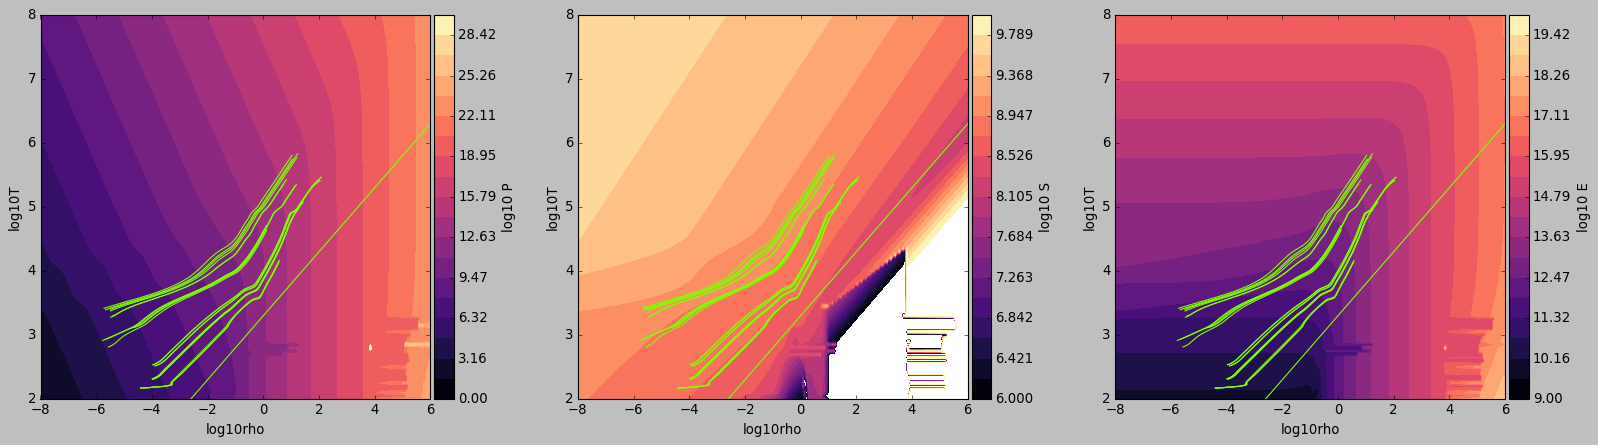

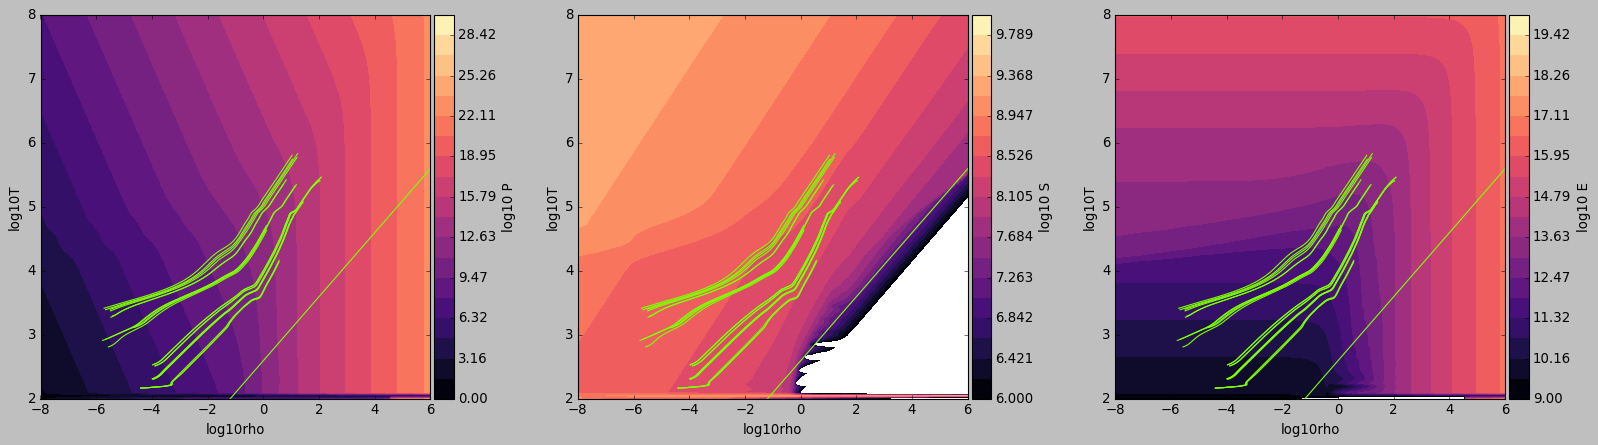

In [43]:
cms19_H = meos.CMStable("../2021_chabrier+_tables/TABLE_H_Trho_v1",units='cgs',F_smoothing_kernel=3)
meos.plot_PSE(cms19_H, 10**cms19_H.log10Pgrid,10**cms19_H.log10Sgrid,10**cms19_H.log10Ugrid,plot_tracks=True)

cms19_He = meos.CMStable("../2021_chabrier+_tables/TABLE_HE_Trho_v1",units='cgs',F_smoothing_kernel=3)
#meos.plot_PSE(cms19_He, 10**cms19_He.log10Pgrid,10**cms19_He.log10Sgrid,10**cms19_He.log10Ugrid,plot_tracks=True)

new_P, new_S, new_E = meos.interpolate_problematic_values(cms19_He,bad_rho_idxs=np.arange(193,203), bad_T_idxs=[79,80,81])
meos.plot_PSE(cms19_He, 10**new_P,10**new_S,10**new_E,plot_tracks=True)

<class 'numpy.ndarray'>
(121, 281, 19)


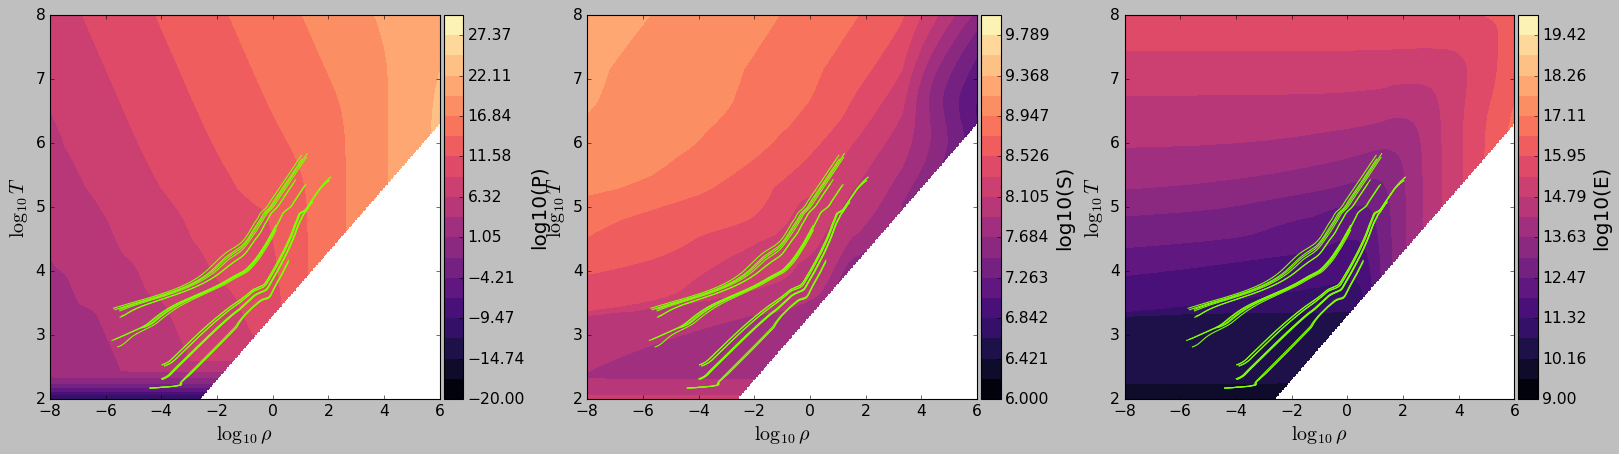

In [44]:
my_Z = meos.read_MESAtable("../my_MESAformat_tables/mesa-planetblend_100z00x.data")
my_Z_Trho = meos.reshapeQTgrid(my_Z,-8,6)
print(type(my_Z_Trho))
print(np.shape(my_Z_Trho))

Z = meos.simple_table()
Z.X = 0.
Z.Y = 0.
Z.Z = 1.

Z.log10Tgrid = my_Z_Trho[:,:,0].T
Z.log10rhogrid = my_Z_Trho[:,:,-1].T

Z.log10Pgrid = my_Z_Trho[:,:,1].T
Z.log10Sgrid = my_Z_Trho[:,:,3].T
Z.log10Ugrid = my_Z_Trho[:,:,2].T

Z.compute_atomic_number()
Z.compute_F(F_smoothing_kernel=3)

meos.contourf_sublots_with_colorbars(nRow=1, nCol=3, 
                                xs=Z.log10rhogrid,
                                ys=Z.log10Tgrid,
                                zs=[Z.log10Pgrid,Z.log10Sgrid,Z.log10Ugrid],
                                xlims=(-8,6),
                                ylims=(2,8),
                                zlims=[(-20,30),(6,10),(9,20)],
                                levels=20,
                                xlabels=r'$\log_{10}\rho$',
                                ylabels=r'$\log_{10}T$',
                                zlabels=['log10(P)','log10(S)','log10(E)'],
                                cmap='magma', vlines=None, hlines=None, otherlines_x=[prof['logRho'] for prof in profiles], otherlines_y=[prof['logT'] for prof in profiles], 
                                species='Z', plot_interpolation_lines=False, savename=None)





# plot orig P, S, E; F-based P,S,E ; comparison

/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_40995/1160784131.py:6: RuntimeWarning: overflow encountered in power
  10**cms19_H.log10Pgrid/10**cms19_H.F_log10Pgrid,10**cms19_H.log10Sgrid/10**cms19_H.F_log10Sgrid,10**cms19_H.log10Ugrid/10**cms19_H.F_log10Egrid],


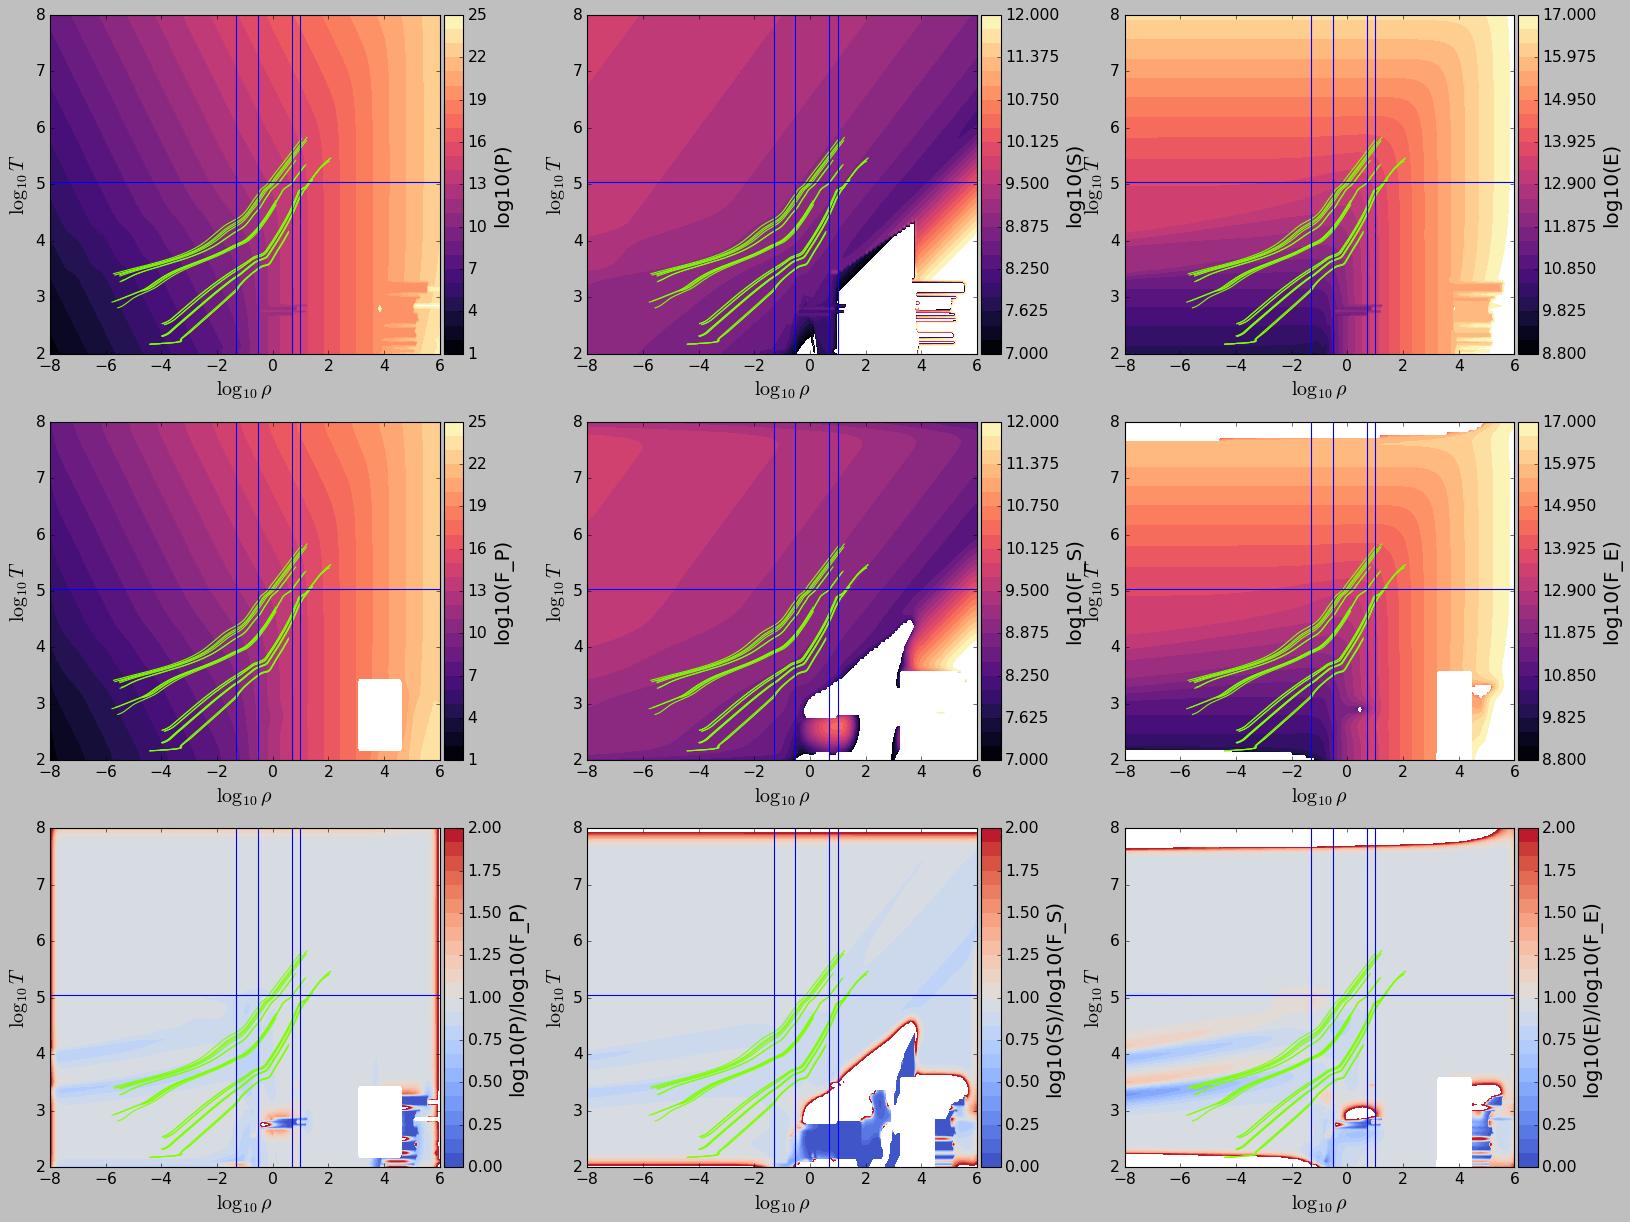

In [45]:
meos.contourf_sublots_with_colorbars(nRow=3, nCol=3, 
                                xs=cms19_H.log10rhogrid,
                                ys=cms19_H.log10Tgrid,
                                zs=[cms19_H.log10Pgrid,cms19_H.log10Sgrid,cms19_H.log10Ugrid,\
                                    cms19_H.F_log10Pgrid,cms19_H.F_log10Sgrid,cms19_H.F_log10Egrid,
                                    10**cms19_H.log10Pgrid/10**cms19_H.F_log10Pgrid,10**cms19_H.log10Sgrid/10**cms19_H.F_log10Sgrid,10**cms19_H.log10Ugrid/10**cms19_H.F_log10Egrid],
                                xlims=(-8,6),
                                ylims=(2,8),
                                zlims=[(1,25),(7,12),(8.8,17),(1,25),(7,12),(8.8,17),(0,2),(0,2),(0,2)],
                                #zlims=None,
                                levels=25,
                                xlabels=r'$\log_{10}\rho$',
                                ylabels=r'$\log_{10}T$',
                                zlabels=['log10(P)','log10(S)','log10(E)','log10(F_P)','log10(F_S)','log10(F_E)','log10(P)/log10(F_P)','log10(S)/log10(F_S)','log10(E)/log10(F_E)'],
                                cmap=['magma','magma','magma','magma','magma','magma','coolwarm','coolwarm','coolwarm'], vlines=None, hlines=None, otherlines_x=[prof['logRho'] for prof in profiles], otherlines_y=[prof['logT'] for prof in profiles], 
                                species='H', plot_interpolation_lines=True, savename=None)

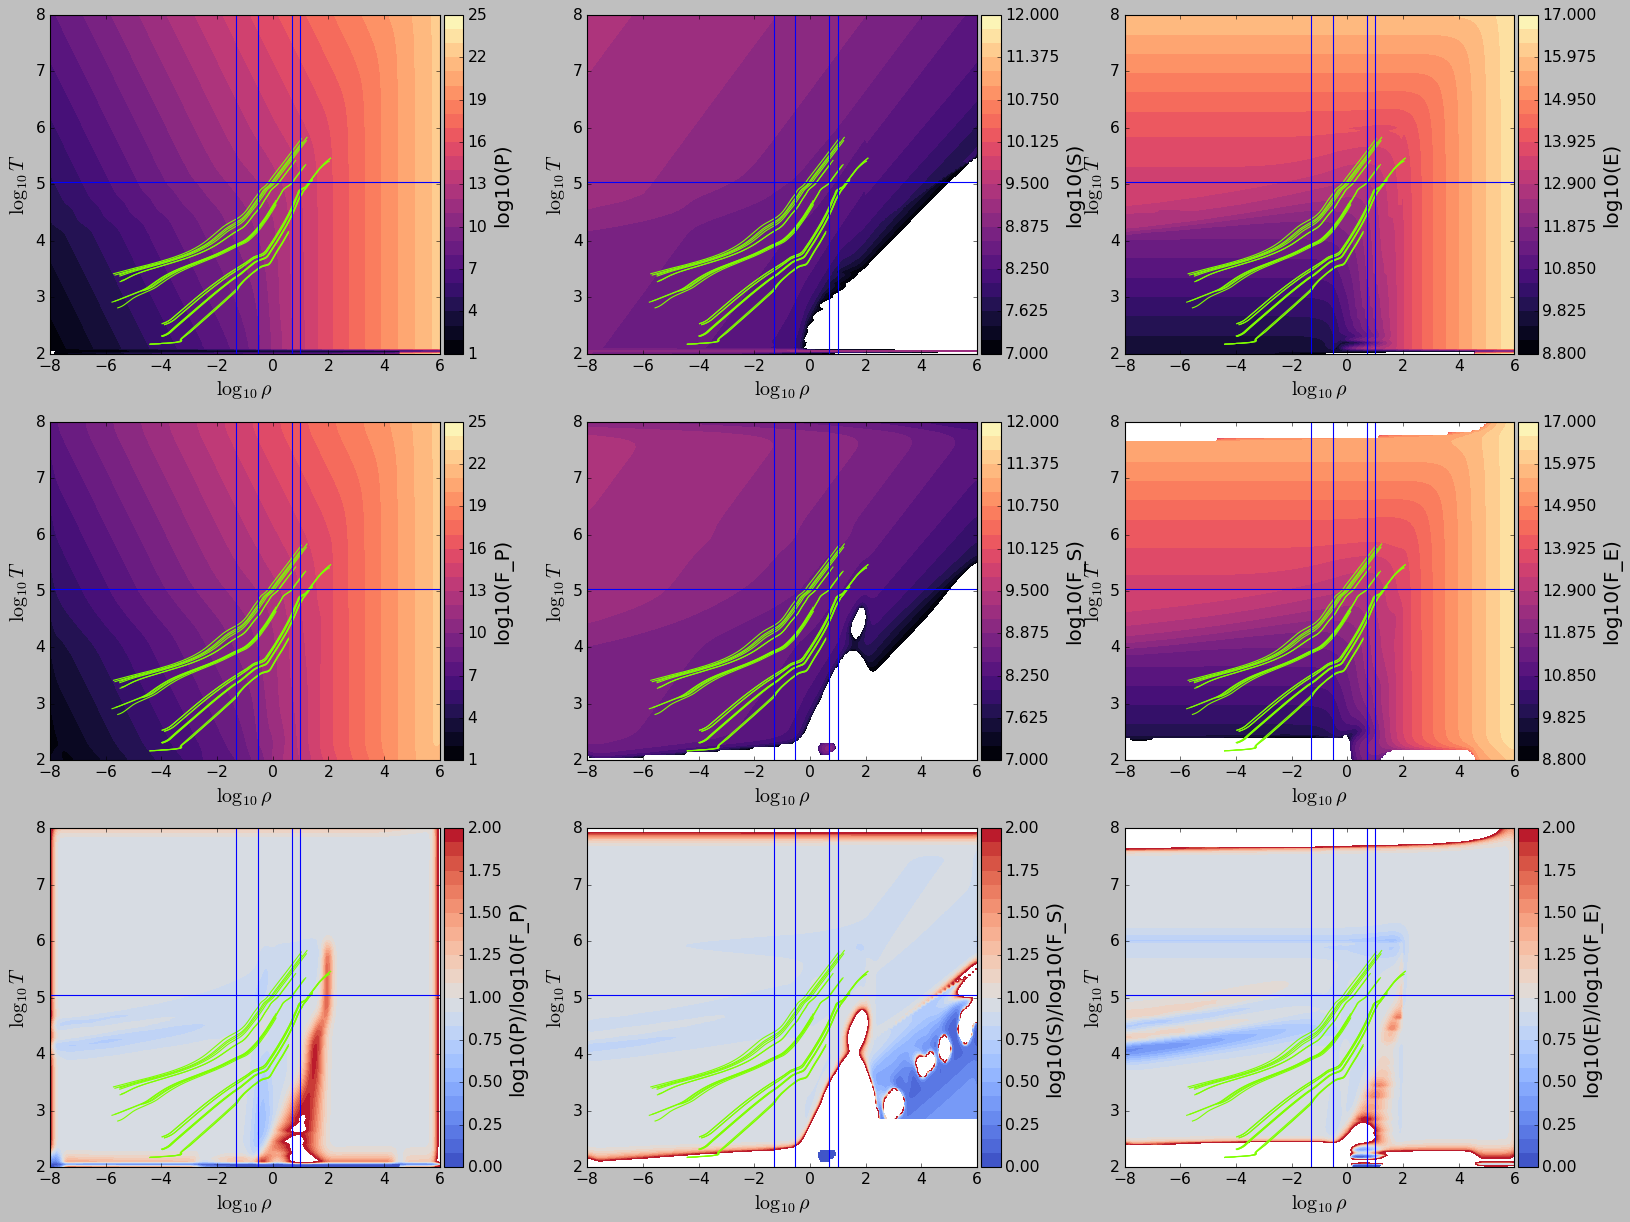

In [46]:
meos.contourf_sublots_with_colorbars(nRow=3, nCol=3, 
                                xs=cms19_He.log10rhogrid,
                                ys=cms19_He.log10Tgrid,
                                zs=[cms19_He.log10Pgrid,cms19_He.log10Sgrid,cms19_He.log10Ugrid,\
                                    cms19_He.F_log10Pgrid,cms19_He.F_log10Sgrid,cms19_He.F_log10Egrid,
                                    10**cms19_He.log10Pgrid/10**cms19_He.F_log10Pgrid,10**cms19_He.log10Sgrid/10**cms19_He.F_log10Sgrid,10**cms19_He.log10Ugrid/10**cms19_He.F_log10Egrid],
                                xlims=(-8,6),
                                ylims=(2,8),
                                zlims=[(1,25),(7,12),(8.8,17),(1,25),(7,12),(8.8,17),(0,2),(0,2),(0,2)],
                                levels=25,
                                xlabels=r'$\log_{10}\rho$',
                                ylabels=r'$\log_{10}T$',
                                zlabels=['log10(P)','log10(S)','log10(E)','log10(F_P)','log10(F_S)','log10(F_E)','log10(P)/log10(F_P)','log10(S)/log10(F_S)','log10(E)/log10(F_E)'],
                                cmap=['magma','magma','magma','magma','magma','magma','coolwarm','coolwarm','coolwarm'], vlines=None, hlines=None, otherlines_x=[prof['logRho'] for prof in profiles], otherlines_y=[prof['logT'] for prof in profiles], 
                                species='H', plot_interpolation_lines=True, savename=None)

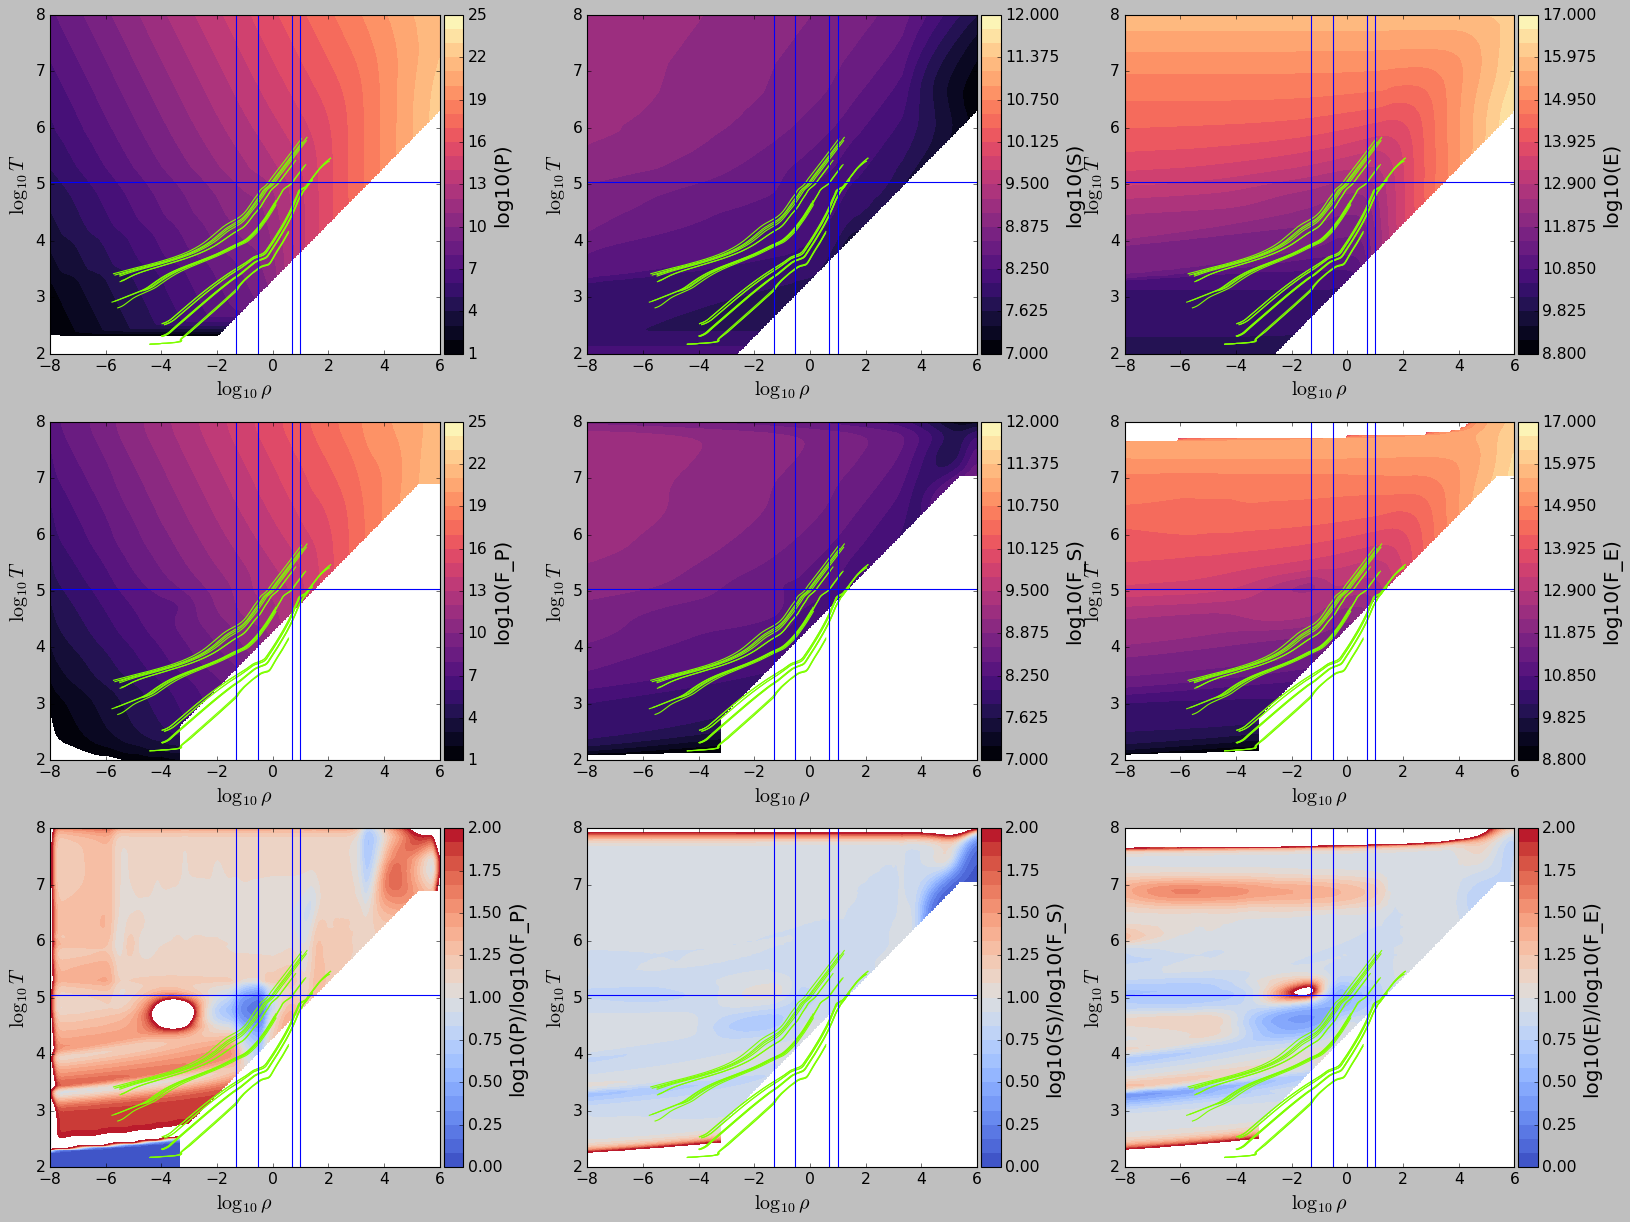

In [47]:
meos.contourf_sublots_with_colorbars(nRow=3, nCol=3, 
                                xs=Z.log10rhogrid,
                                ys=Z.log10Tgrid,
                                zs=[Z.log10Pgrid,Z.log10Sgrid,Z.log10Ugrid,\
                                    Z.F_log10Pgrid,Z.F_log10Sgrid,Z.F_log10Egrid,
                                    10**Z.log10Pgrid/10**Z.F_log10Pgrid,10**Z.log10Sgrid/10**Z.F_log10Sgrid,10**Z.log10Ugrid/10**Z.F_log10Egrid],
                                xlims=(-8,6),
                                ylims=(2,8),
                                zlims=[(1,25),(7,12),(8.8,17),(1,25),(7,12),(8.8,17),(0,2),(0,2),(0,2)],
                                levels=25,
                                xlabels=r'$\log_{10}\rho$',
                                ylabels=r'$\log_{10}T$',
                                zlabels=['log10(P)','log10(S)','log10(E)','log10(F_P)','log10(F_S)','log10(F_E)','log10(P)/log10(F_P)','log10(S)/log10(F_S)','log10(E)/log10(F_E)'],
                                cmap=['magma','magma','magma','magma','magma','magma','coolwarm','coolwarm','coolwarm'], vlines=None, hlines=None, otherlines_x=[prof['logRho'] for prof in profiles], otherlines_y=[prof['logT'] for prof in profiles], 
                                species='H', plot_interpolation_lines=True, savename=None)

# check that F approach resulted in good thermo consistency

/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_40995/2486869891.py:4: RuntimeWarning: overflow encountered in power
  10**cms19_H.log10Pgrid,10**cms19_H.log10Sgrid,10**cms19_H.log10Egrid,


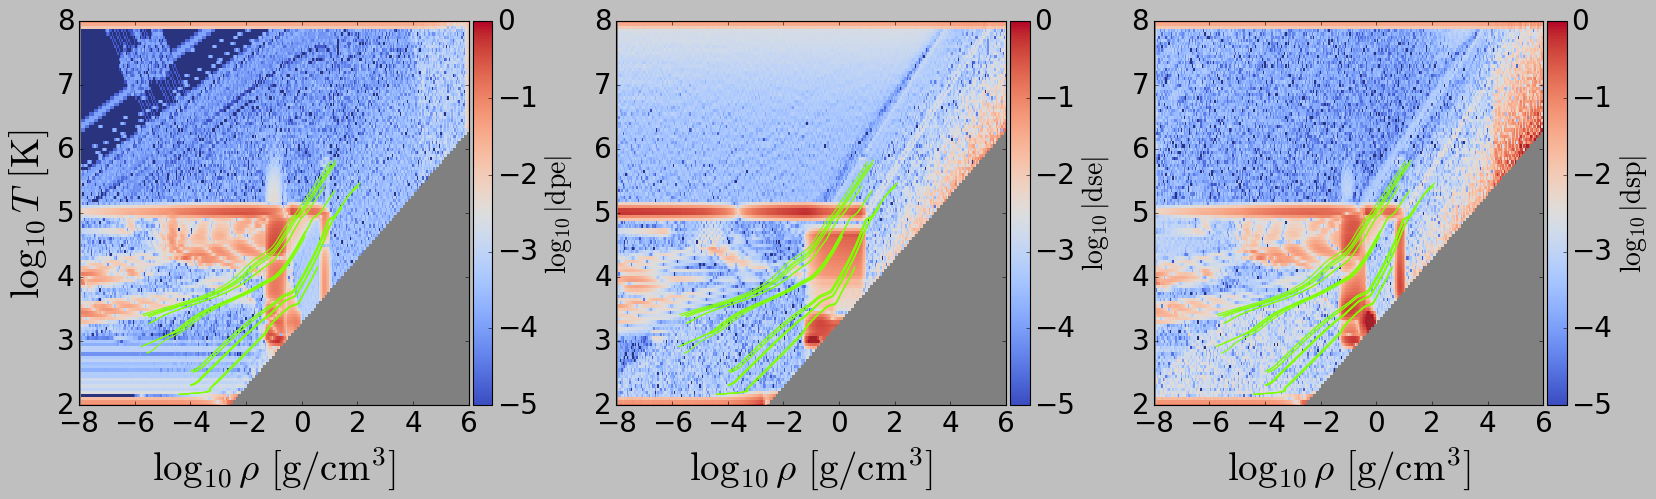

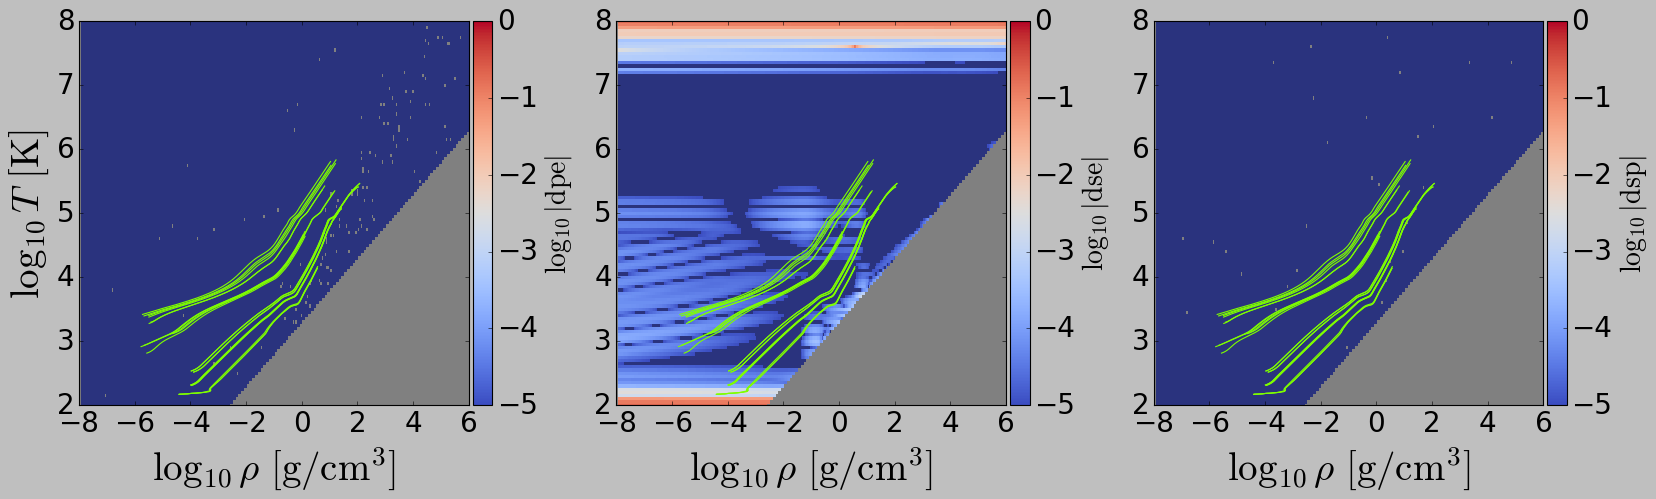

In [48]:
# original

H_dpe, H_dse, H_dsp, H_a, H_b, H_c = meos.consistency_metrics(cms19_H, 
                                                              10**cms19_H.log10Pgrid,10**cms19_H.log10Sgrid,10**cms19_H.log10Egrid,
                                                              species='H',maskUnphysicalRegion=False,
                                                              plot=False,plot_tracks=True,paperplot=True, savename=None)

# new

F_H_dpe, F_H_dse, F_H_dsp, F_H_a, F_H_b, F_H_c = meos.consistency_metrics(cms19_H, 
                                                                          cms19_H.F_Pgrid,cms19_H.F_Sgrid,cms19_H.F_Egrid,
                                                                          species='H',maskUnphysicalRegion=False,
                                                                          plot=False,plot_tracks=True,paperplot=True, savename=None)


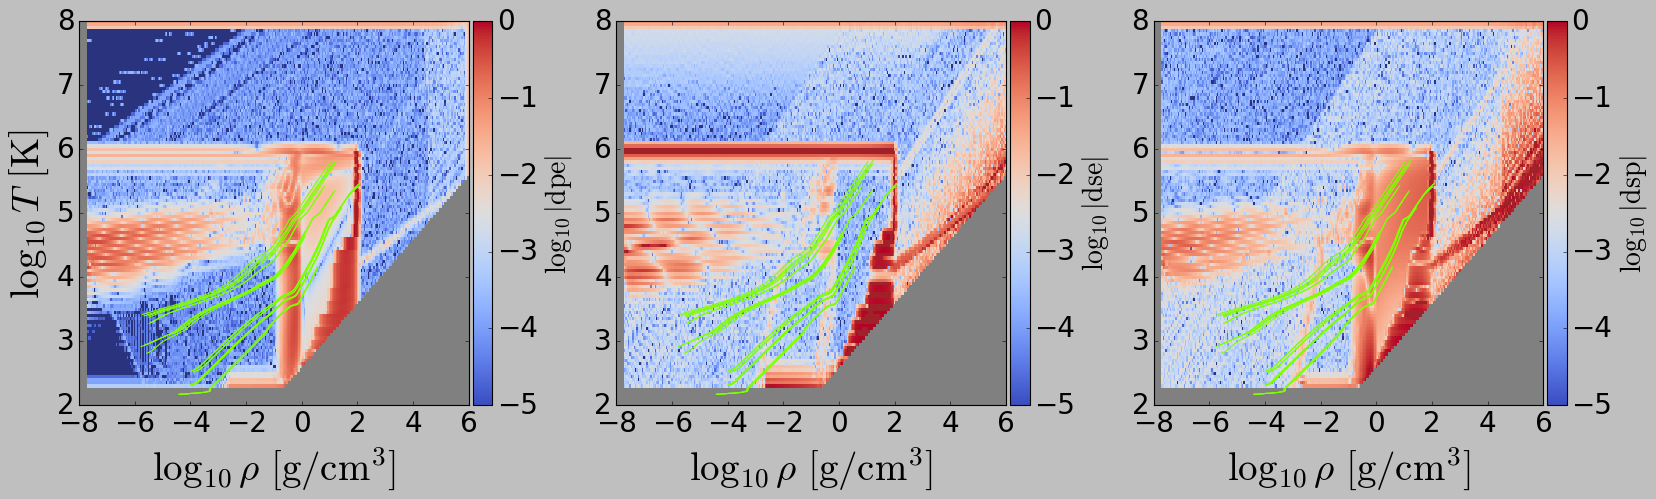

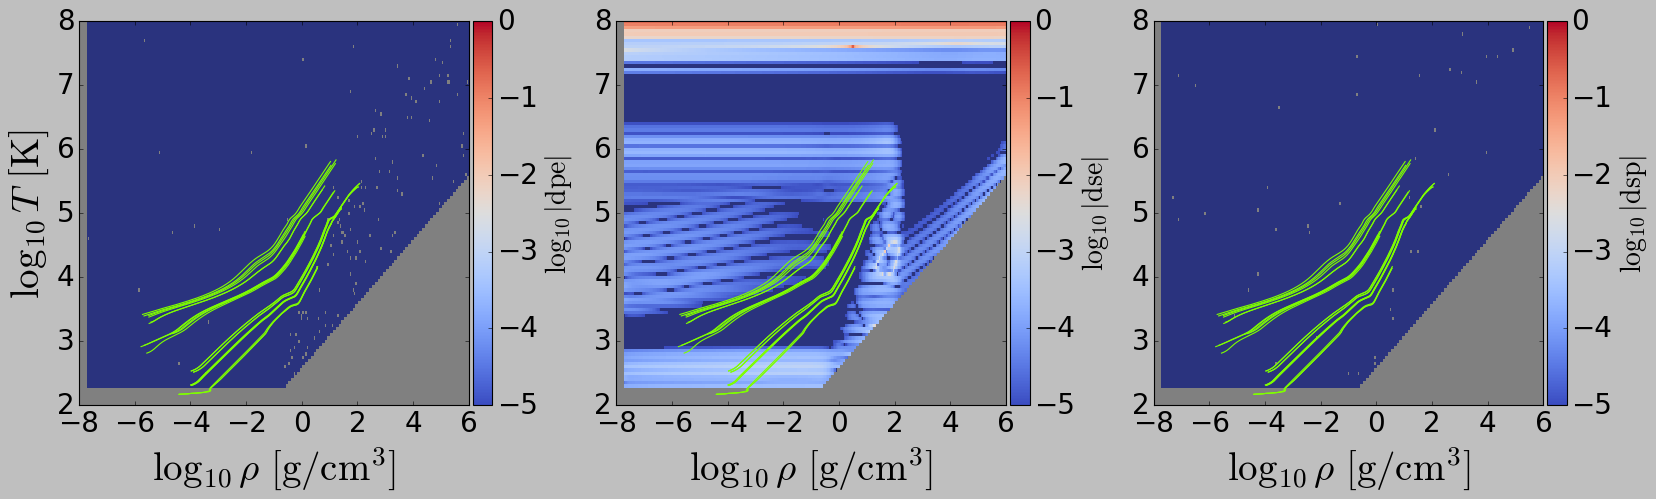

In [49]:
# original
He_dpe, He_dse, He_dsp, He_a, He_b, He_c = meos.consistency_metrics(cms19_He, 
                                                                    10**cms19_He.log10Pgrid,10**cms19_He.log10Sgrid,10**cms19_He.log10Egrid,
                                                                    species='He',maskUnphysicalRegion=False,
                                                                    plot=False,plot_tracks=True, paperplot=True,savename=None)

#new
He_dpe, He_dse, He_dsp, He_a, He_b, He_c = meos.consistency_metrics(cms19_He, 
                                                                    cms19_He.F_Pgrid,cms19_He.F_Sgrid,cms19_He.F_Egrid,
                                                                    species='He',maskUnphysicalRegion=False,
                                                                    plot=False,plot_tracks=True, paperplot=True,savename=None)


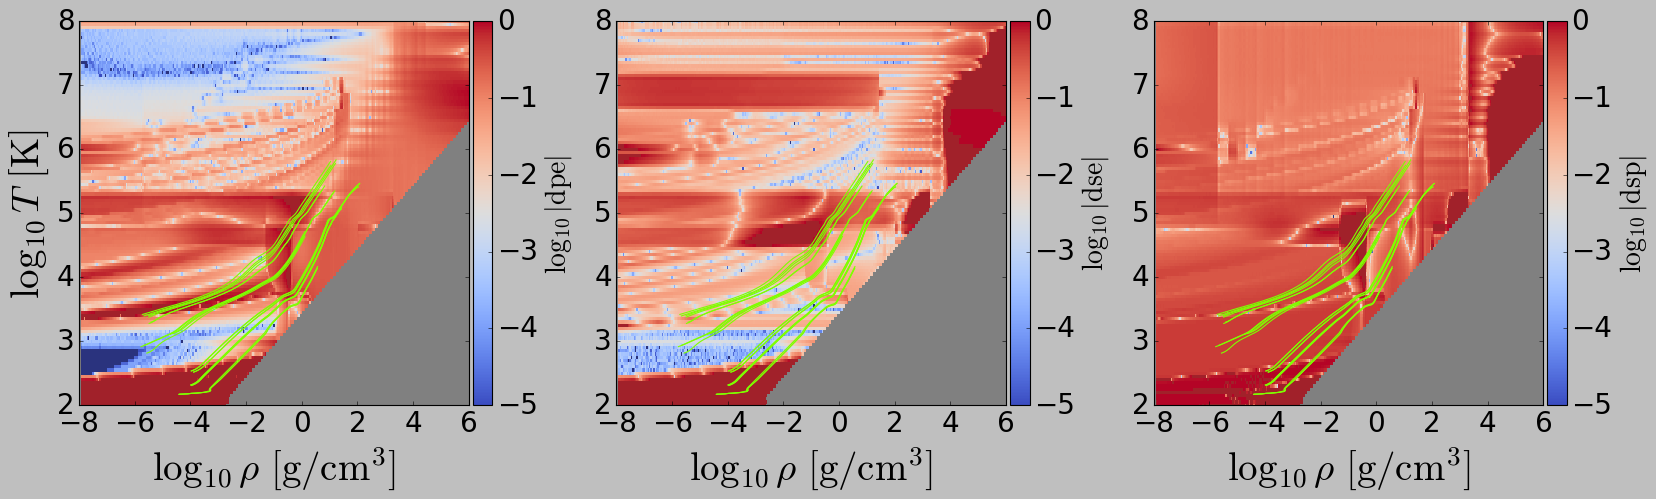

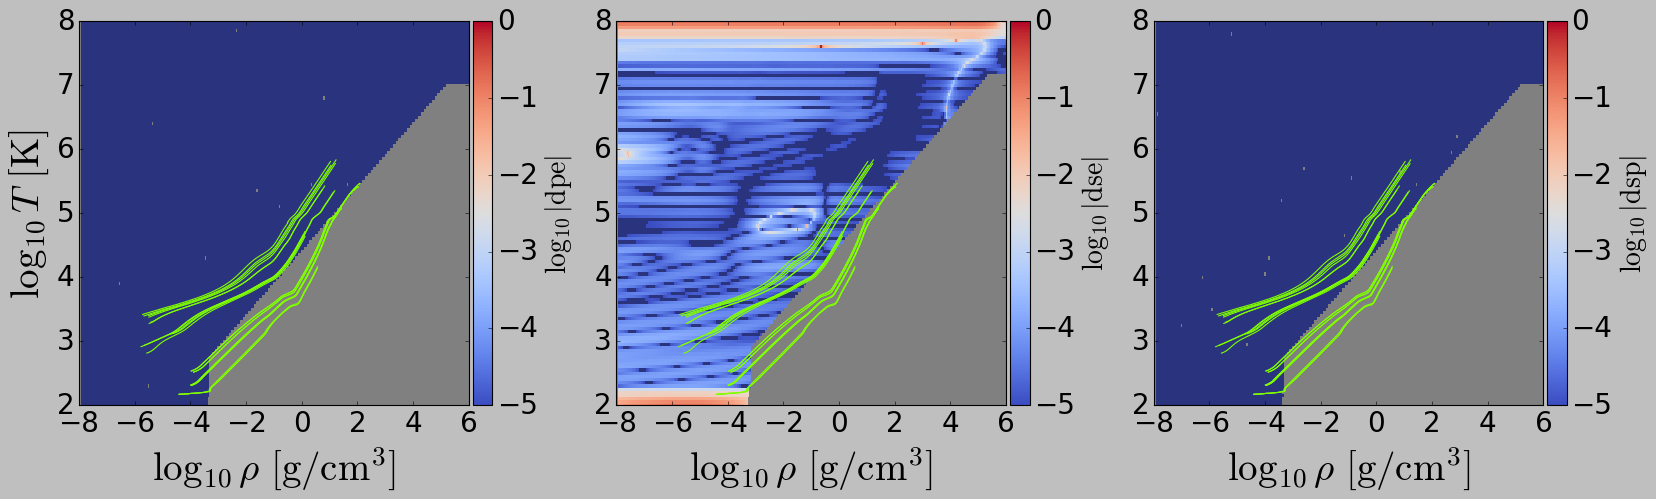

In [50]:
#original
Z_dpe, Z_dse, Z_dsp, Z_a, Z_b, Z_c = meos.consistency_metrics(Z, 
                                                              10**Z.log10Pgrid,10**Z.log10Sgrid,10**Z.log10Ugrid,
                                                              species='H',maskUnphysicalRegion=False,
                                                              plot=False,plot_tracks=True,paperplot=True, savename=None)

# new
Z_dpe, Z_dse, Z_dsp, Z_a, Z_b, Z_c = meos.consistency_metrics(Z, 
                                                              Z.F_Pgrid,Z.F_Sgrid,Z.F_Egrid,
                                                              species='H',maskUnphysicalRegion=False,
                                                              plot=False,plot_tracks=True,paperplot=True, savename=None)
